In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.model_selection import train_test_split

In [2]:
df_advertising = pd.read_csv(r"D:\Proyectos Data Science\Regresión lineal\Gasto en publicidad vs. ventas\Advertising.csv")
df_advertising[:5]

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df_advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df_advertising.describe().iloc[1:,:]

,TV,radio,newspaper,sales
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Podemos observar que en promedio la empresa invierte mas publicidad en:
- 1: TV
- 2: NEWSPAPER
- 3: RADIO

Tambien se puede observar que en monto minimo invertido televisión contiene el valor mas alto con 0.70,
seguido de 0.30 en newpaper, un punto muy importnate es que en radio no hay valores minimos, solo tenemos nula inversion,
es decir 0, siendo el medio en el cual posiblemente no se ha querido invertir en ciertas ocasiones.

In [5]:
def histogramas(df):

    '''Funcion para graficar(histogramas) mis variables del dataframe'''

    fig, ax = plt.subplots(2,2, figsize = (10,10))
    for row,col in enumerate(df.columns):
        row_ = row// 2
        col_ = row % 2
        ax[row_,col_].hist(df[col],bins = 50)
        ax[row_,col_].set_title(col)

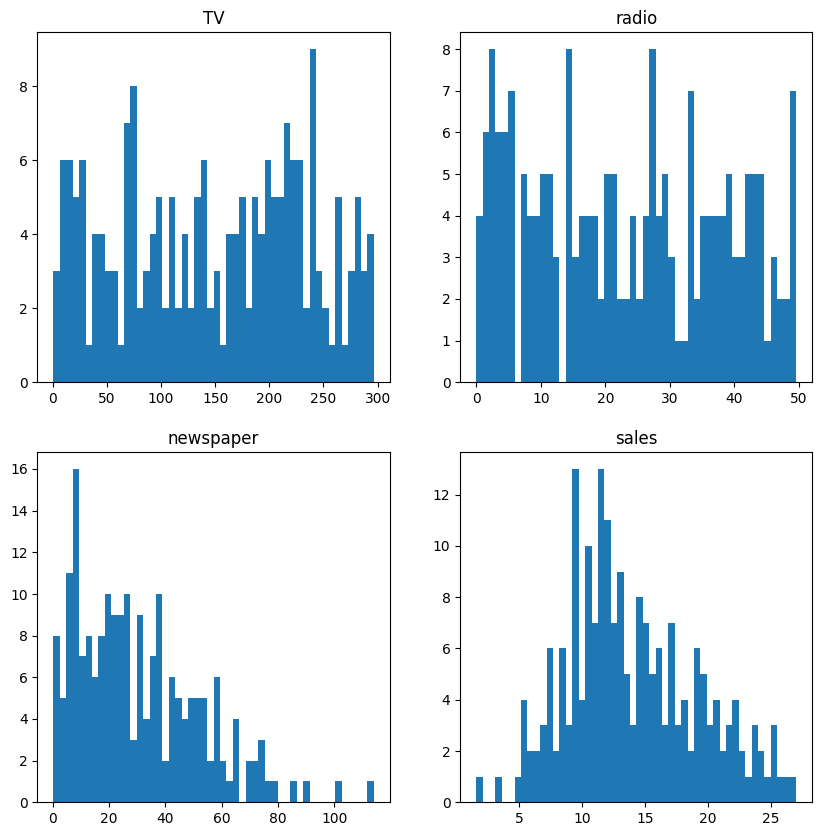

In [6]:
histogramas(df_advertising)
    

- Podemos observar que la variable de televisión tiene distribuidas inversiones en publicidad de 0.70 a casi 300 miles de dolares con un rango de inversion mayor a las otras formas de publicidad
- Radio tiene un rango de inversion mas pequeño entre los 0 y 50 mil dolares
- Pereodico tiene un sesgo a la derecha lo que lo hace un medio con menores inversiones de cantidades arriba de los 80 mil dolares
- Las ventas parecen tener una distribucion normal, lo que podria decirse que la mayor parte de las ventas estan dentro del rango de 10 y 20 mil dolares

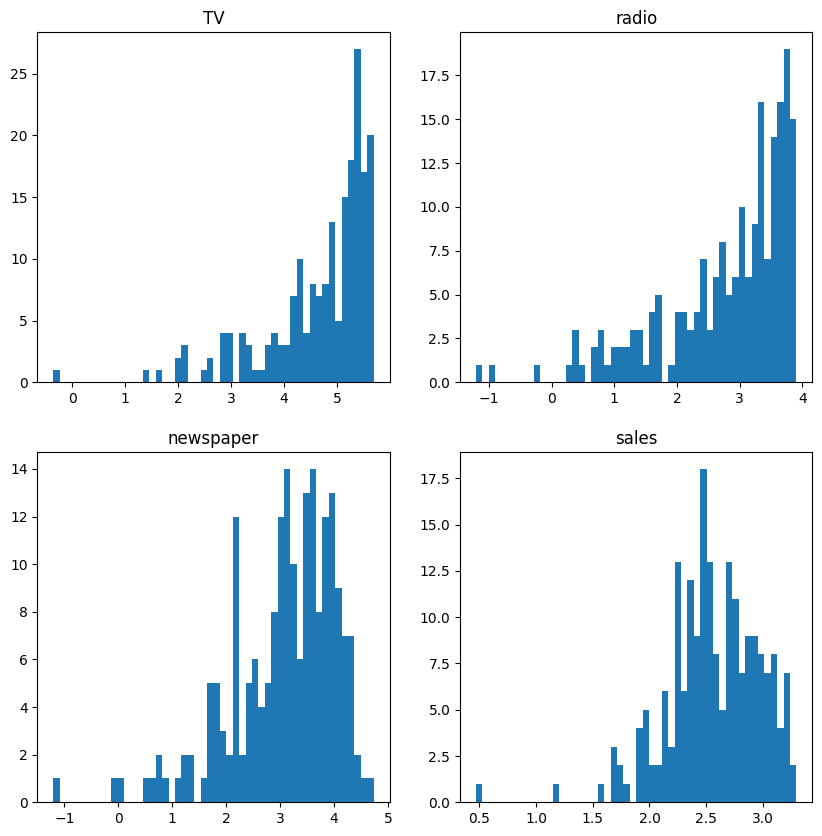

In [7]:
x = df_advertising.copy()
x = x[x>0]
histogramas(x.map(lambda x: np.log(x)))

Disperción de los datos

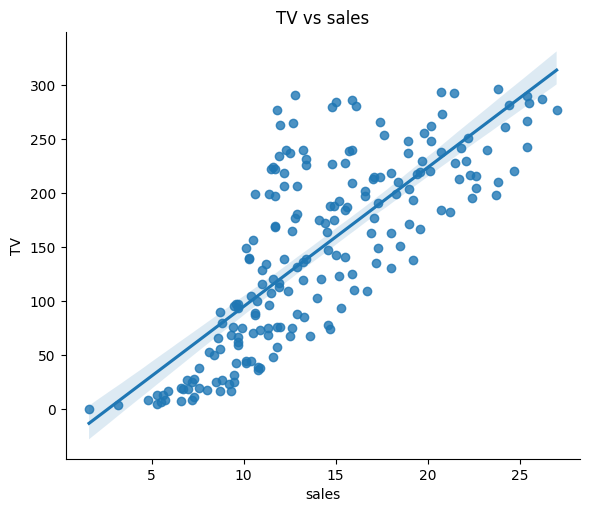

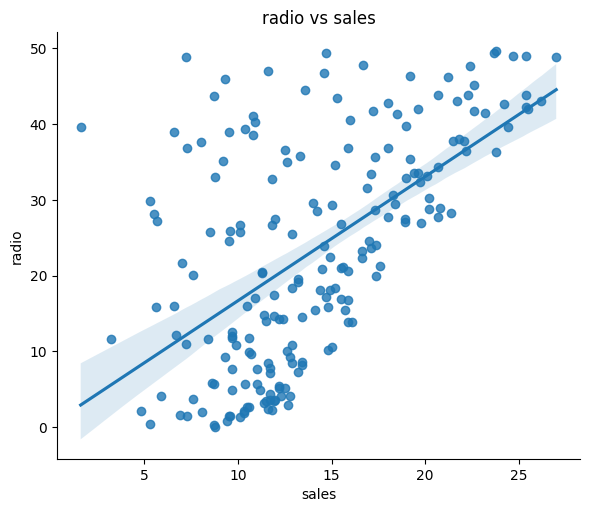

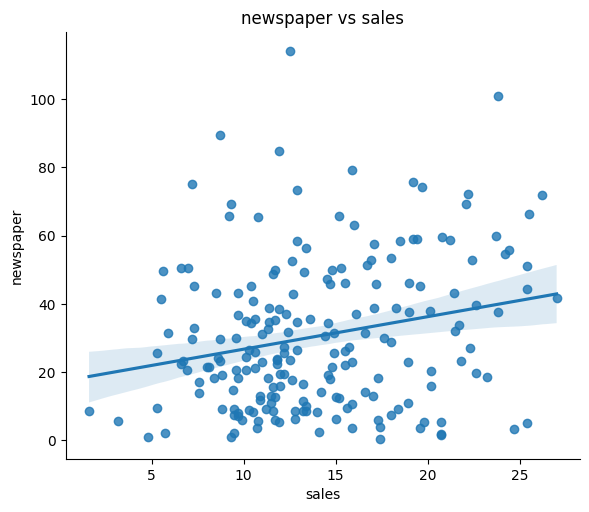

In [8]:
def g_dispersion(df):
    variables = df.columns.drop("sales")  # Excluye la columna de ventas
    for col in variables:
        sns.lmplot(data=df, x="sales", y=col, height=5, aspect=1.2)
        plt.title(f"{col} vs sales")

g_dispersion(df_advertising)

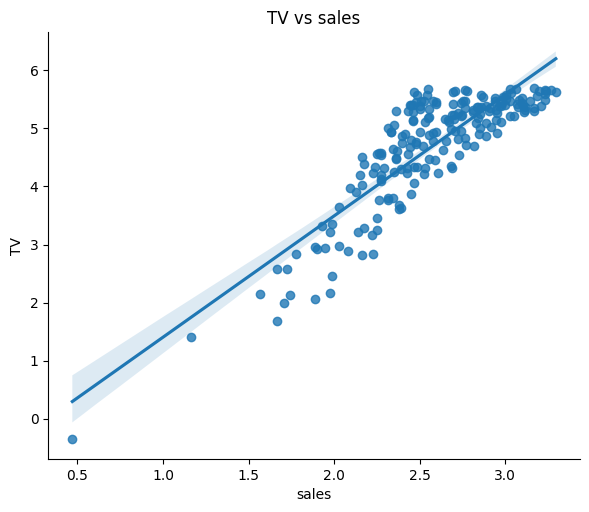

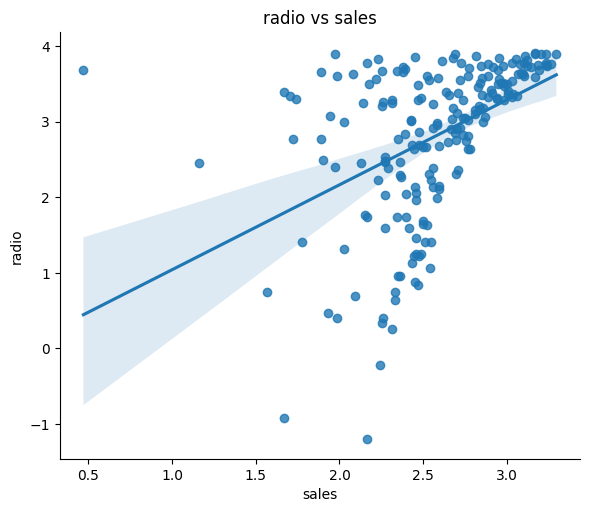

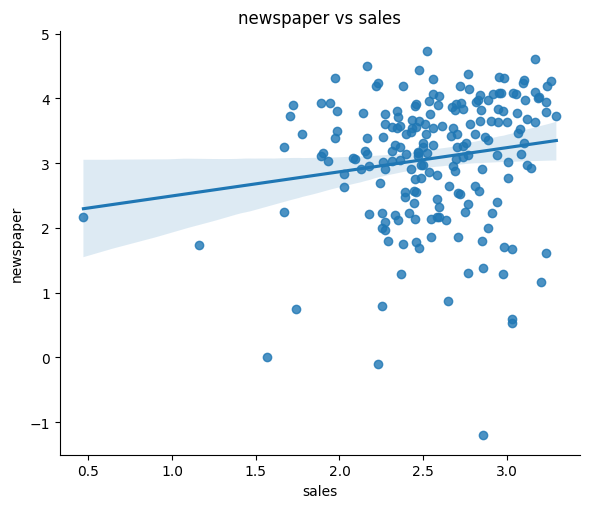

In [9]:
df_log = x.map(lambda x: np.log(x))

g_dispersion(df_log)

In [10]:
df_advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Distribución de muestreo

In [11]:
def muestreo(df, columna):
    '''Funcion para realizar muestreo'''
    muestreo_data_1000 = pd.DataFrame({"muestra":df[columna].sample(100), "type":"Data"})
    mean_data_5 = pd.DataFrame({"muestra":[float(df[columna].sample(5).mean()) for _ in range(100)], "type":"mean of 5"})
    mean_data_20 = pd.DataFrame({"muestra":[float(df[columna].sample(20).mean()) for _ in range(100)], "type":"mean of 20"})
    return pd.concat([muestreo_data_1000,mean_data_5,mean_data_20])


def medias_hist(df,name_col):
    '''Fncion para graficar'''
    g = sns.FacetGrid(df,col = name_col,col_wrap=1, height=2,aspect=2)
    g.map(plt.hist,"muestra", bins = 7)
    plt.tight_layout()
    plt.show()

In [12]:
df_advertising.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [13]:
# extraemos las muestras de las variables del dataframe
tv_muestreo = muestreo(df_advertising,"TV")
radio_muestreo = muestreo(df_advertising,"radio")
newspaper_muestreo = muestreo(df_advertising,"newspaper")
sales_muestreo = muestreo(df_advertising,"sales")

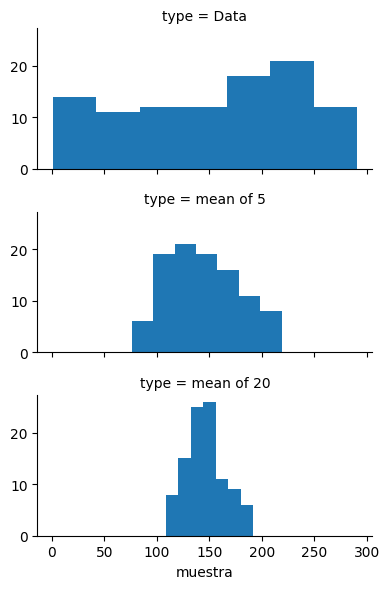

In [14]:
# graficando las muestras de TV
medias_hist(tv_muestreo,"type")

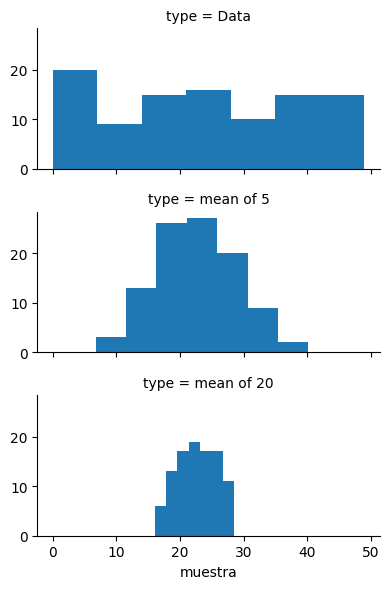

In [15]:
# muestras de radio
medias_hist(radio_muestreo,"type")

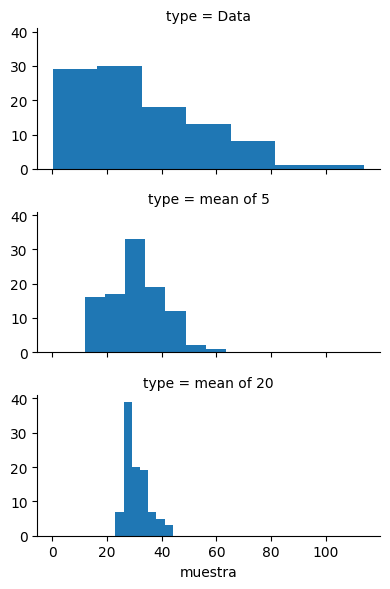

In [16]:
# muestras de newspaper
medias_hist(newspaper_muestreo,"type")

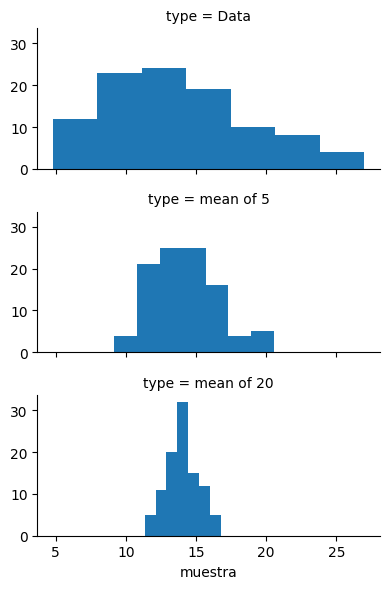

In [17]:
# muestras de sales
medias_hist(sales_muestreo,"type")

In [18]:
# calculo de los bins adecuados para muestras pequeñas
int(np.log2(1 + len(df_advertising["TV"])))

7

# Division de los conjuntos de entrenamiento

In [19]:
'''Aqui vamos a dividir nuestros conjuntos de entrenamiento, validacion y prueba'''

var_y = df_advertising["sales"]
var_x = df_advertising.loc[:,df_advertising.columns != "sales"]

#aqui dividimos el primer conjunto de entrenameinto y prueba
x_train_full, x_test, y_train_full, y_test = train_test_split(var_x,var_y,
                                                              test_size=15,
                                                              random_state=40,
                                                              shuffle=True)

x_train, x_val, y_train, y_val = train_test_split(x_train_full,y_train_full,
                                                  test_size=15,
                                                  random_state= 40,
                                                  shuffle=True
                                                  )

In [20]:
# validacion del tamaño de mis muestras
print(f"conjunto prueba x:{x_test.shape} - y: {y_test.shape}")
print(f"conjunto validacion x:{x_val.shape} - y: {y_val.shape}")
print(f"conjunto entrenamiento x:{x_train.shape} - y: {y_train.shape}")

conjunto prueba x:(15, 3) - y: (15,)
conjunto validacion x:(15, 3) - y: (15,)
conjunto entrenamiento x:(170, 3) - y: (170,)


# Entrenamiento del modelo

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [22]:
# definimos una semilla
seed = 40

In [23]:
def df_resample(x,y):
    '''Funcion para seleccionar datos aleatorios con remplazo y observar como el modelo realiza predicciones seleccionando una variable aleatoria'''
    return pd.merge(left=x,right=y, left_index=True, right_index=True).sample(x.shape[0], replace=True)

def predict_models(x_train,x_val,y_train,y_val):
    # aqui juntamos als variables en un data frame
    df_resampled_train = df_resample(x_train,y_train)
    # aqui convertimos lso vaores en un array
    y_train = df_resampled_train["sales"].values
    x_train = df_resampled_train.drop(columns = "sales")

    # seleccionamos una variable para valdiar como se esta comportando la realcion entre la variable objetivo y la variable TV
    var_tv = ["TV"]

    # definir los modelos
    lr = LinearRegression()
    rf = RandomForestRegressor(n_estimators=200,random_state=seed)

    models = [lr,rf]

    predictions = {}

    for model in models:
        model.fit(x_train.loc[:,var_tv], y_train)
        y_pred = model.predict(x_val.loc[:,var_tv])
        predictions[type(model).__name__] = y_pred
    

    df_results = x_val.copy().loc[:,var_tv]
    df_results["sales"] = y_val
    df_results["regresion_lineal"] = predictions["LinearRegression"]
    df_results["random_forest"] = predictions["RandomForestRegressor"]
    return df_results

In [24]:
# aqui repetimos el modelo 100 veces para observar como se comporta y poder posteriormente visualizarlo

n_smaples = 100
df_results = pd.DataFrame()

for i in range(0, n_smaples):
    df_model_iteration = predict_models(x_train,x_val,y_train,y_val)
    df_model_iteration["iteration"] = i +1
    df_results = pd.concat([df_results,df_model_iteration], axis = 0)


df_results[:10]

,TV,sales,regresion_lineal,random_forest,iteration
141,193.7,19.2,16.192889,20.9360,1
151,121.0,11.6,12.962530,13.8835,1
60,53.5,8.1,9.963228,8.4510,1
36,266.9,25.4,19.445464,16.6460,1
49,66.9,9.7,10.558645,9.7035,1
178,276.7,11.8,19.880919,18.7100,1
22,13.2,5.6,8.172534,5.6840,1
149,44.7,10.1,9.572208,10.2780,1
175,276.9,27.0,19.889805,18.7100,1
186,139.5,10.3,13.784561,17.7110,1


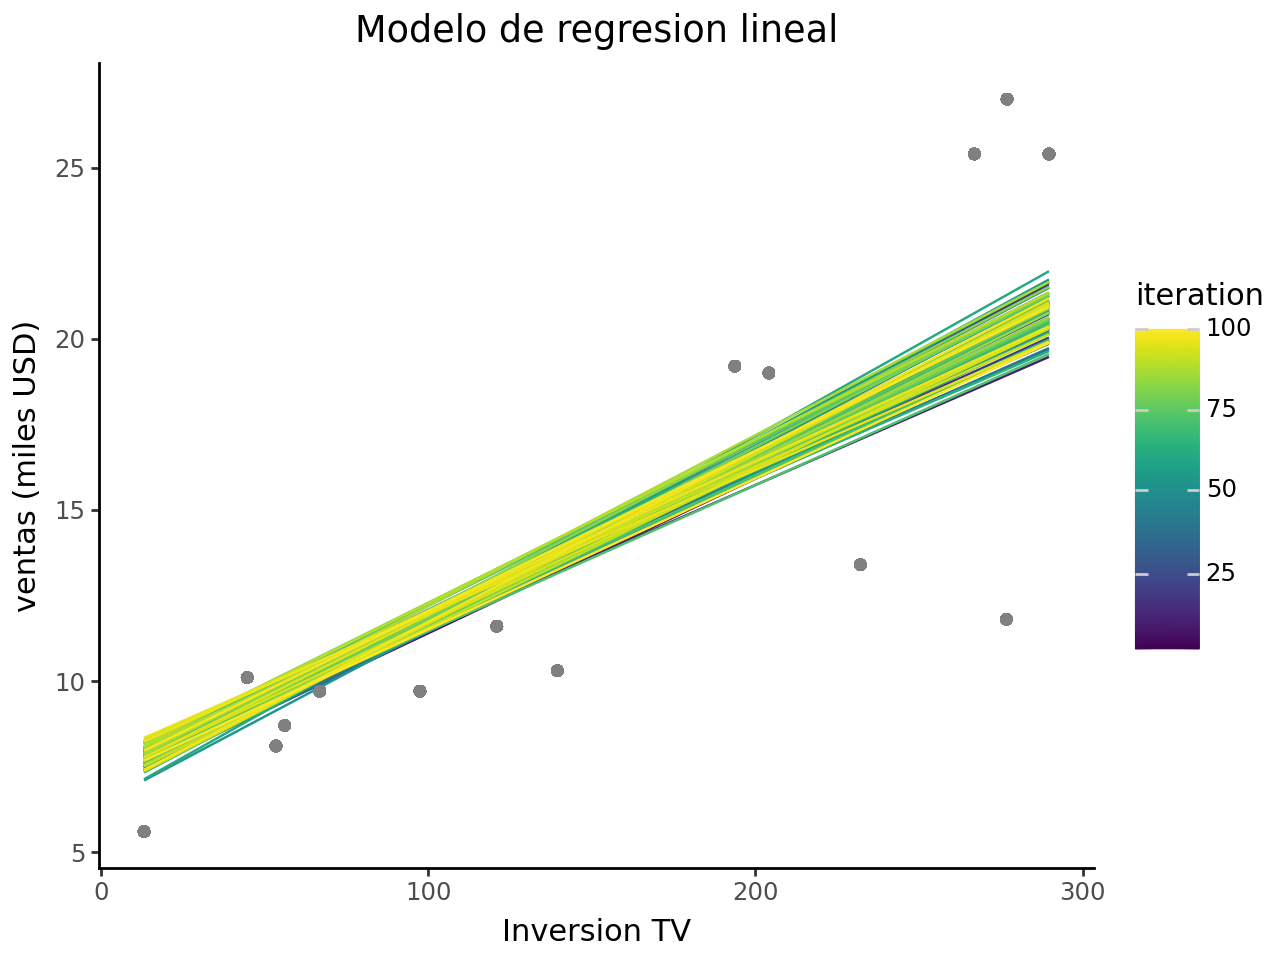

In [25]:
# graficamos el modelo lineal

gg = (ggplot() + 
      geom_line(df_results, aes("TV", "regresion_lineal", group = "iteration", color = "iteration")) +
      geom_point(df_results, aes("TV","sales"), color = "grey") + 
      labs(title = "Modelo de regresion lineal", y = "ventas (miles USD)", x = "Inversion TV") +
      theme_classic())

gg

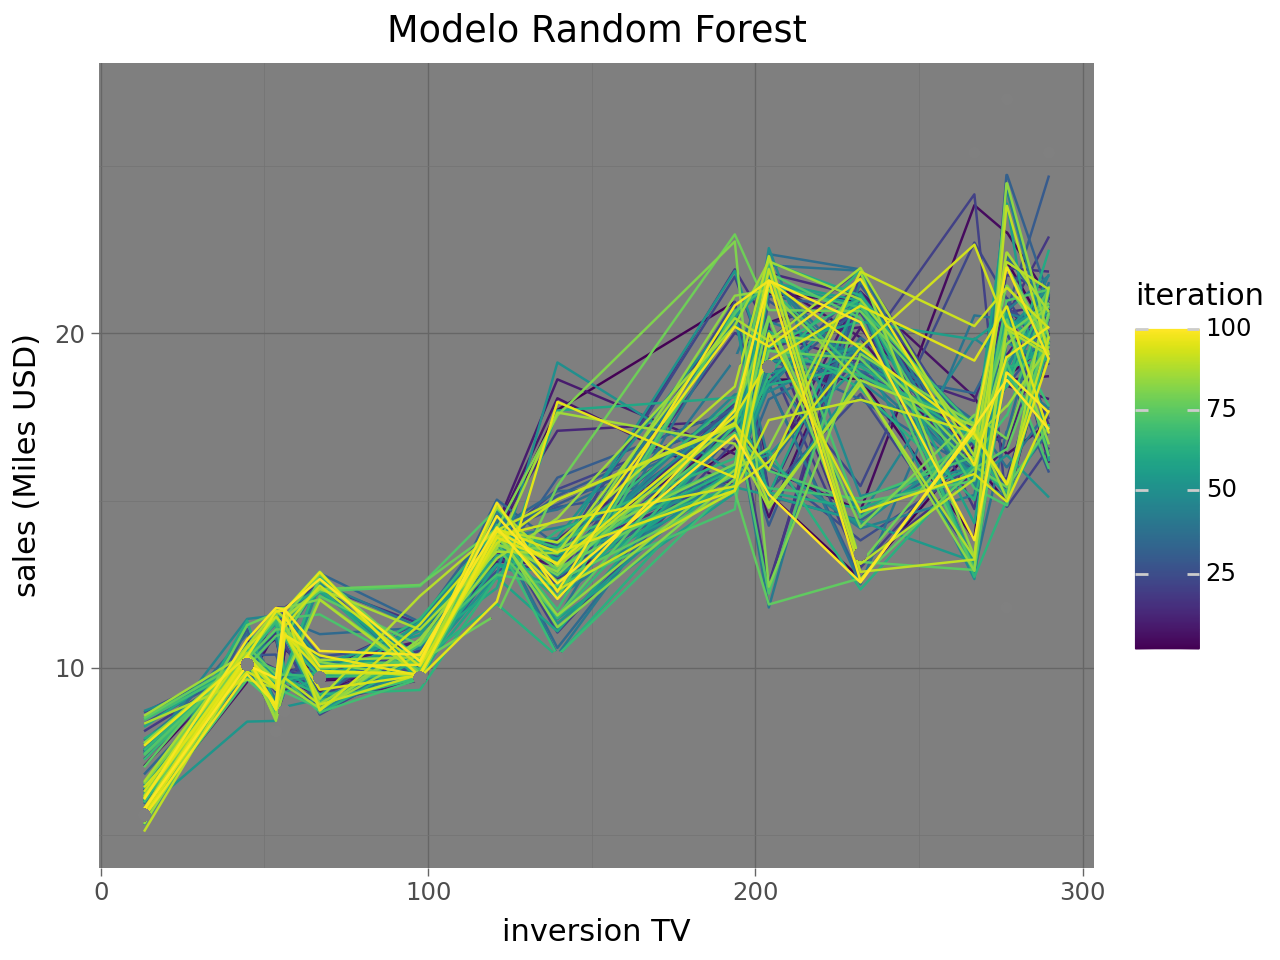

In [26]:
# Graficamos el modelo de bosque aleatorio

gg = (ggplot() + 
      geom_line(df_results, aes("TV","random_forest",group = "iteration",color = "iteration")) +
      geom_point(df_results, aes("TV","sales"), color = "grey")+
      labs(title= "Modelo Random Forest", y = "sales (Miles USD)", x = "inversion TV")+
      theme_dark()
      )

gg

# Comportamiento del modelo con datos normalizados

In [27]:
# Definicion de variables x e y

log_x = df_log.loc[:, df_log.columns != "sales"]
log_y = df_log["sales"]

'''Separacion del conjunto de prueba y entrenamiento'''

x_train_log_full, x_test_log, y_train_log_full,y_test_log = train_test_split(log_x,log_y,
                                                                        test_size=15,
                                                                        random_state=40,
                                                                        shuffle=True)

x_train_log, x_val_log, y_train_log,y_val_log = train_test_split(x_train_log_full,y_train_log_full,
                                                                        test_size=15,
                                                                        random_state=40,
                                                                        shuffle=True)


# entrenamiento del modelo

df_results_log = pd.DataFrame()

for i in range(0, n_smaples):
    df_model_log_iteration = predict_models(x_train_log,x_val_log,y_train_log,y_val_log)
    df_model_log_iteration["iteration"] = i + 1
    df_results_log = pd.concat([df_results_log,df_model_log_iteration], axis = 0)

df_results_log[:10]

,TV,sales,regresion_lineal,random_forest,iteration
141,5.266311,2.954910,2.751195,2.849525,1
151,4.795791,2.451005,2.589700,2.585586,1
60,3.979682,2.091864,2.309589,2.247856,1
36,5.586874,3.234749,2.861221,2.732404,1
49,4.203199,2.272126,2.386306,2.157372,1
178,5.622934,2.468100,2.873598,3.046244,1
22,2.580217,1.722767,1.829254,1.709263,1
149,3.799974,2.312535,2.247908,2.326562,1
175,5.623656,3.295837,2.873846,3.046244,1
186,4.938065,2.332144,2.638532,2.686466,1


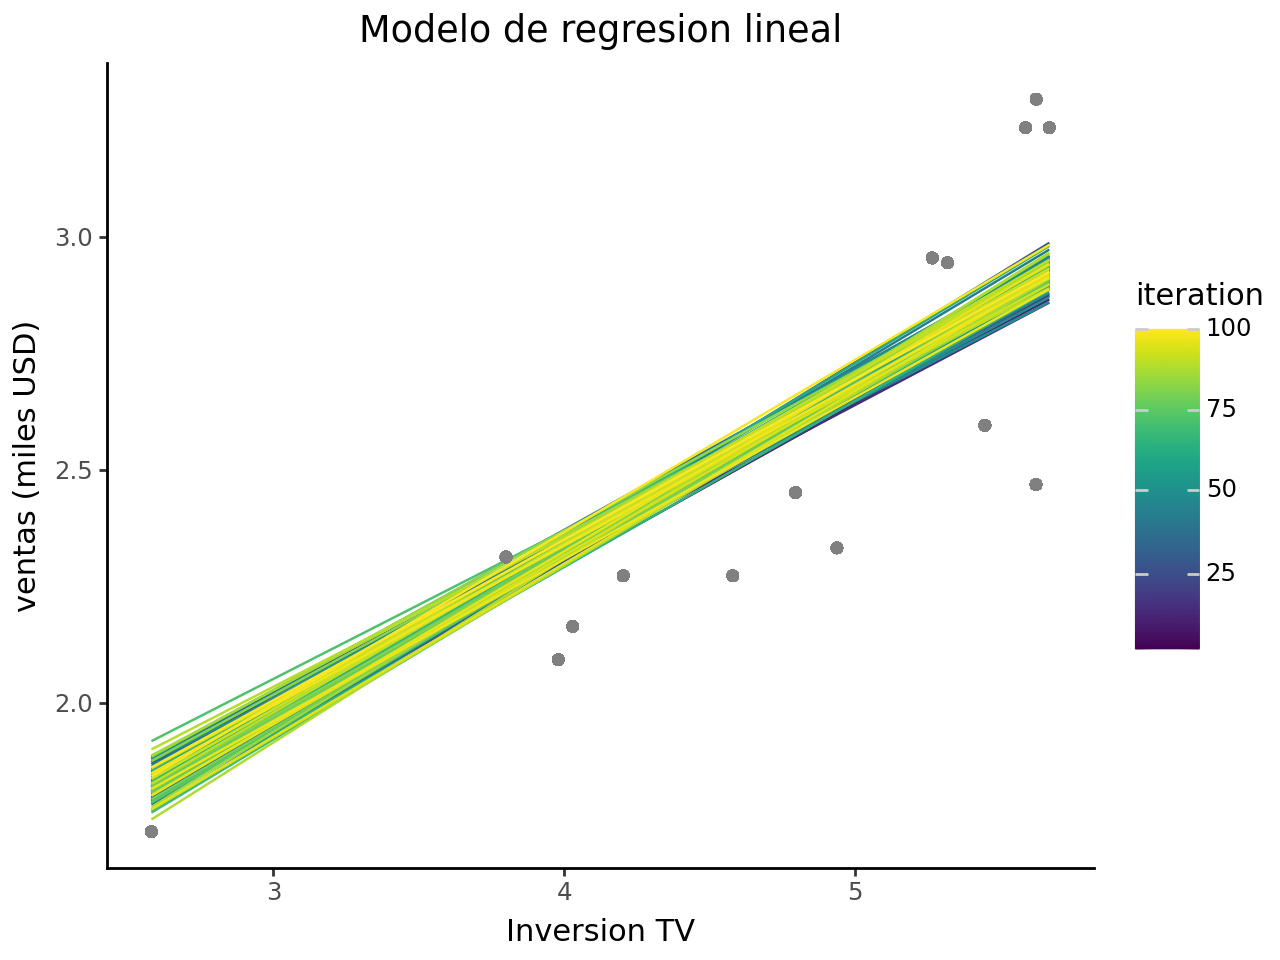

In [28]:
# graficamos el modelo lineal

gg = (ggplot() + 
      geom_line(df_results_log, aes("TV", "regresion_lineal", group = "iteration", color = "iteration")) +
      geom_point(df_results_log, aes("TV","sales"), color = "grey") + 
      labs(title = "Modelo de regresion lineal", y = "ventas (miles USD)", x = "Inversion TV") +
      theme_classic())

gg

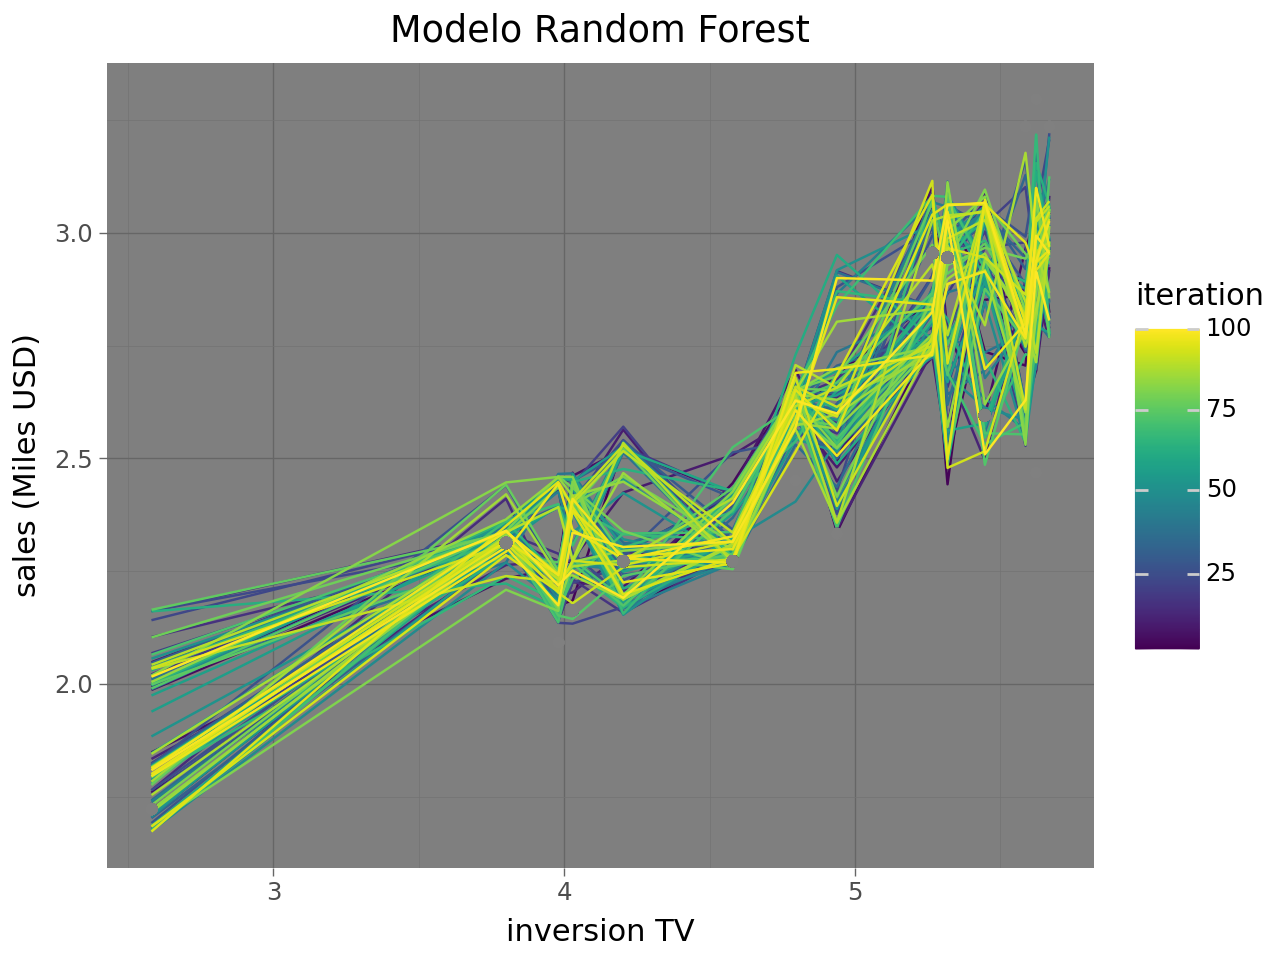

In [29]:
# Graficamos el modelo de bosque aleatorio

gg = (ggplot() + 
      geom_line(df_results_log, aes("TV","random_forest",group = "iteration",color = "iteration")) +
      geom_point(df_results_log, aes("TV","sales"), color = "grey")+
      labs(title= "Modelo Random Forest", y = "sales (Miles USD)", x = "inversion TV")+
      theme_dark()
      )

gg

- Se puede observar una mejora signiifcativa en la prediccion de la variables objetivo, por lo tanto se utilizara para el entrenamiento los datos normalizados

# EVALUACION DE VARIABLES

In [39]:
# eliminamos valores nulos 
sin_nulos = pd.concat([x_train_log,y_train_log], axis = 1).reset_index(drop = True).dropna()
x_train_log = sin_nulos.loc[:,["TV","radio","newspaper"]]
y_train_log = sin_nulos["sales"]


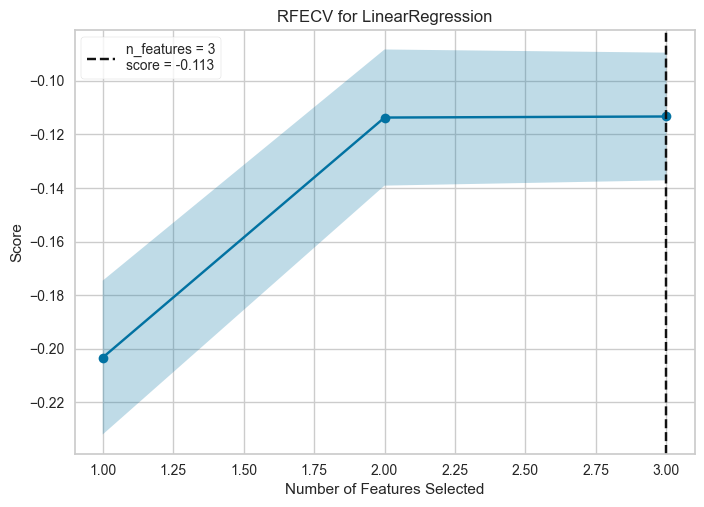

<Axes: title={'center': 'RFECV for LinearRegression'}, xlabel='Number of Features Selected', ylabel='Score'>

In [40]:
'''Utilizamos RFECV para la elimincacion de varaibles con validacion cruzada para seleccionar las caracteristicas mas relevantes'''

from yellowbrick.model_selection import RFECV


linear_reg = LinearRegression()


visualizer = RFECV(
    linear_reg,
    scoring="neg_root_mean_squared_error",
    cv = 10
)

# pasamos datos de entrenamiento
visualizer.fit(x_train_log,y_train_log)

# visualizamos el grafico
visualizer.show()

Podemos observar que para el modelo las variables (3 variables de entrenamiento) son muy importantes por lo que no arroja eliminacion de alguna

In [41]:
#Correlacion de las variables con las ventas
pd.concat([x_train_log,y_train_log],axis=1).corr()["sales"]

TV           0.874021
radio        0.436262
newspaper    0.186736
sales        1.000000
Name: sales, dtype: float64

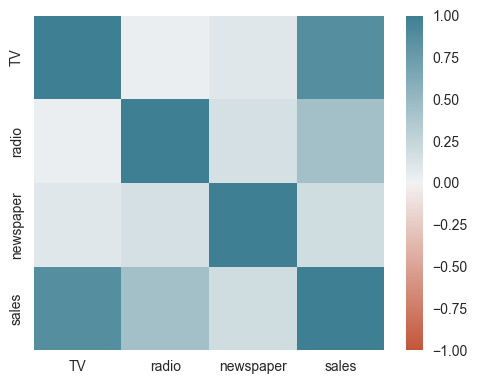

In [42]:
# validamos con un grafico de correlacion
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(pd.concat([x_train_log,y_train_log],axis=1).corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

# VALIACION CRUZADA

- Al tener pocos datos se opta por utilizar validación cruzada esto para poder aprovechar al maximo nuestros datos

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
valores_sin_nulos = pd.merge(x_train_log,y_train_log, right_index=True, left_index=True).reset_index().dropna()
x_train_log = valores_sin_nulos.loc[:,valores_sin_nulos.columns != "sales"]
y_train_log = valores_sin_nulos["sales"]

In [45]:
x_train_log[x_train_log.isna().any(axis = 1)]

,index,TV,radio,newspaper


In [46]:
linear_reg = LinearRegression()


# definimos el calculo de la validacion cruzada

scores = cross_val_score(
    linear_reg,
    x_train_log,
    y_train_log,
    cv = 10,
    scoring= "neg_root_mean_squared_error"
)

# creamos una funcion para imprimir los errores de validacion cruzada

def func_print_cross_validation_error(scores):
    print("Error de entrenamiento (RMSE):")
    [print(f" - Split - {k}:{np.round(-1 * error,2)}") for k,error in enumerate(scores)]

    print("\nCross validation error (RMSE):")
    print(f"-Error promedio: {np.round(np.mean(-1*scores),2)}")
    print(f"- Desviacion estandar del error: {np.round(np.std(-1*scores))}")

In [47]:
func_print_cross_validation_error(scores)

Error de entrenamiento (RMSE):
 - Split - 0:0.11
 - Split - 1:0.09
 - Split - 2:0.11
 - Split - 3:0.15
 - Split - 4:0.12
 - Split - 5:0.1
 - Split - 6:0.09
 - Split - 7:0.08
 - Split - 8:0.16
 - Split - 9:0.11

Cross validation error (RMSE):
-Error promedio: 0.11
- Desviacion estandar del error: 0.0


con el error promedio de 0.11 podemos decir que mi valor puede ser tanto positivo como negativo. Es decir el modelo en promedio puede estar a 0.11 por encima o por debajoo de los valores reales de ventas

# Validacion del modelo con el conjunto de validacion y en el conjunto de prueba

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
x_train_log = x_train_log.drop(columns=["index"])

In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Asegúrate de definir tu modelo si no lo has hecho antes
linear_reg = LinearRegression()

# Función para imprimir el error de predicción
def func_print_error(x_train_log, x_test_log, y_train_log, y_test_log):
    # Entrena el modelo en los datos transformados
    linear_reg.fit(x_train_log, y_train_log)
    
    # Realiza predicciones en el conjunto de prueba
    y_pred_log = linear_reg.predict(x_test_log)
    
    # # Convierte de vuelta a la escala original si está en escala logarítmica
    # if log_scale:
    #     y_test_orig = np.expm1(y_test_log)  # inversa de log1p
    #     y_pred_orig = np.expm1(y_pred_log)
    # else:
    #     y_test_orig = y_test_log
    #     y_pred_orig = y_pred_log
    
    # Calcula el RMSE en la escala original
    rmse = np.round(np.sqrt(mean_squared_error(y_test_log, y_pred_log)), 2)
    print(f"--Error promedio (RMSE): {rmse}")

# Llama a la función con tus datos
func_print_error(x_train_log, x_test_log, y_train_log, y_test_log)


--Error promedio (RMSE): 0.1


In [51]:
# imprimir conjunto de validacion
func_print_error(x_train_log,x_val_log,y_train_log,y_val_log)

--Error promedio (RMSE): 0.11


Se obtienen los siguientes valores, que podemos utilizar como punto de partida para mejorar nuestro modelo.

- Error promedio de validación (RMSE): 0.11 
- Error promedio de prueba (RMSE): 0.1

Se puede observar una fuerte correlacion de la varibale objetivo con la variable TV